In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

df = pd.read_csv("Base4.csv")

dfhap = df[df['supplier']=='harpy.co']
dfhap.shape
dfwes = df[df['supplier']=='westeros.inc']
dfwes.head()



,unsullen.id,production.date,report.date,produced,defects,supplier
1350,51,1,1,106,0,westeros.inc
1351,51,1,2,0,8,westeros.inc
1352,51,1,3,0,9,westeros.inc
1353,51,1,4,0,8,westeros.inc
1354,51,1,5,0,12,westeros.inc


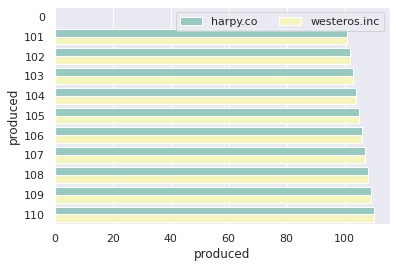

In [2]:


df['produced'] = df['produced'].astype(int)
sns.set(style="darkgrid")
ax = sns.barplot(x="produced", y="produced", hue="supplier", data=df, palette = "Set3", orient = "h")
ax.legend(ncol=4, loc="upper right", frameon=True)



In [3]:


hapAllProd = sum(dfhap['produced'])
wesAllProd = sum(dfwes['produced'])
hapAllDef = sum (dfhap['defects'])
wesAllDef = sum (dfwes['defects'])

hapAvgDef = hapAllDef/hapAllProd
wesAvgDef = wesAllDef/wesAllProd



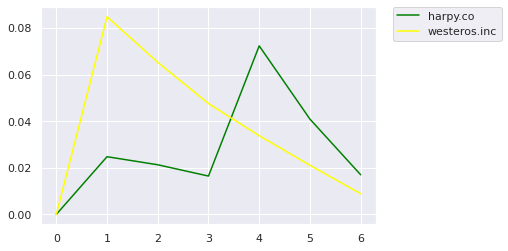

In [4]:


dfhap1 = dfhap[dfhap['report.date'] - dfhap['production.date'] == 1]
dfhap1avgdef = sum (dfhap1['defects']) / hapAllProd
dfhaps = []
dfwess = []
for i in range(7):
    dfhaps.append( dfhap[dfhap['report.date'] - dfhap['production.date'] == i] )
    dfwess.append( dfwes[dfwes['report.date'] - dfwes['production.date'] == i] )
hapMonthDef = [] 
wesMonthDef = []
for i in range(7):
    hapMonthDef.append(sum (dfhaps[i]['defects']) / hapAllProd)
    wesMonthDef.append(sum (dfwess[i]['defects']) / wesAllProd)

plt.plot(range(7), hapMonthDef, color = "Green", label = "harpy.co")
plt.plot(range(7), wesMonthDef, color = "Yellow", label = "westeros.inc")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



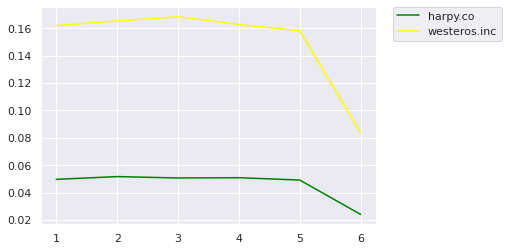

In [5]:


dfWesMonProd = []
dfHapMonProd = []
for i in range (6):
    dfWesMonProd.append(dfwes[dfwes['production.date']==i+1])
    dfHapMonProd.append(dfhap[dfhap['production.date']==i+1])
dfWesMonProdAvgDef = []
dfHapMonProdAvgDef = []
for i in range (6):
    dfWesMonProdAvgDef.append(sum(dfWesMonProd[i][dfWesMonProd[i]['report.date']<=3+i]['defects']) / sum(dfWesMonProd[i]['produced']))
    dfHapMonProdAvgDef.append(sum(dfHapMonProd[i][dfHapMonProd[i]['report.date']<=3+i]['defects']) / sum(dfHapMonProd[i]['produced']))

dfWesMonProdAvgDef
plt.plot(1+np.arange(6), dfHapMonProdAvgDef, color = "Green", label = "harpy.co")
plt.plot(1+np.arange(6), dfWesMonProdAvgDef, color = "Yellow", label = "westeros.inc")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



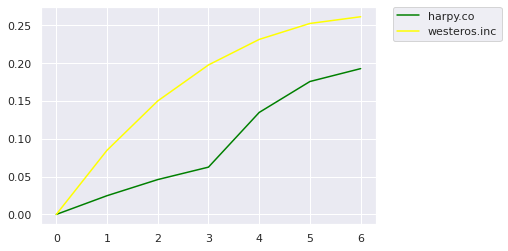

In [6]:


dfhaps1 = []
dfwess1 = []
for i in range(7):
    dfhaps1.append( dfhap[dfhap['report.date'] - dfhap['production.date'] <= i] )
    dfwess1.append( dfwes[dfwes['report.date'] - dfwes['production.date'] <= i] )
hapMonthDef1 = [] 
wesMonthDef1 = []
for i in range(7):
    hapMonthDef1.append(sum (dfhaps1[i]['defects']) / hapAllProd)
    wesMonthDef1.append(sum (dfwess1[i]['defects']) / wesAllProd)

plt.plot(range(7), hapMonthDef1, color = "Green", label = "harpy.co")
plt.plot(range(7), wesMonthDef1, color = "Yellow", label = "westeros.inc")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



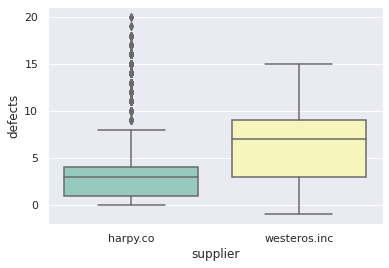

In [7]:


sns.boxplot(x='supplier', y='defects', palette = "Set3", data=df)
plt.show()

